In [1]:
from google.colab import files
uploaded = files.upload()

Saving nba.csv to nba (1).csv
Saving employees.csv to employees (1).csv


## **Import Modules**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **EMPLOYEE**

## **Read data**

In [3]:
df_employee = pd.read_csv("employees.csv")
df_employee["Start Date"] = pd.to_datetime(df_employee["Start Date"], format = "%m/%d/%Y")
df_employee['Last Login Time'] = pd.to_datetime(df_employee['Last Login Time']).dt.strftime('%H:%M')

## **Basic EDA**

***Top 5 records***

In [4]:
df_employee.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,06:53,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,13:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,16:47,101004,1.389,True,Client Services


**Info**

In [5]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    object        
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   object        
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  933 non-null    object        
 7   Team               957 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 62.6+ KB


***Describe***

In [6]:
df_employee.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


**Columns**

In [7]:
df_employee.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

***Data Types***

In [8]:
df_employee.dtypes

First Name                   object
Gender                       object
Start Date           datetime64[ns]
Last Login Time              object
Salary                        int64
Bonus %                     float64
Senior Management            object
Team                         object
dtype: object

**Missing Values**

In [9]:
df_employee.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

***NULL values***

In [10]:
df_employee.isna().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

***Shape***

In [11]:
df_employee.shape

(1000, 8)

## **Nan values**

знайти та відобразити стовпці таблиці, які мають
пропущені дані; 
видалити рядки з пропусками даних

Shape

In [12]:
df_employee.shape
print(f"Columns: {df_employee.shape[1]}\nRows: {df_employee.shape[0]}")

Columns: 8
Rows: 1000


Count of nan values in columns

In [13]:
df_employee.isna().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

Drop rows with NaN values

In [14]:
df_employee.dropna(axis=0, inplace=True)

**Shape**

In [15]:
df_employee.shape
print(f"Columns: {df_employee.shape[1]}\nRows: {df_employee.shape[0]}")

Columns: 8
Rows: 764


Count of nan values in columns

In [16]:
df_employee.isna().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

## **Aggregation functions + Visualisation**

**mean()**

In [17]:
df_employee.groupby(['Gender', 'Team'])['Salary'].mean()

Gender  Team                
Female  Business Development    92645.020408
        Client Services         85742.723404
        Distribution            79812.161290
        Engineering             89708.139535
        Finance                 93483.333333
        Human Resources         89835.878788
        Legal                   91749.242424
        Marketing               97116.555556
        Product                 86333.704545
        Sales                   90055.628571
Male    Business Development    87851.000000
        Client Services         93781.789474
        Distribution            92302.379310
        Engineering             99937.027778
        Finance                 95663.842105
        Human Resources         92149.976744
        Legal                   84491.882353
        Marketing               84745.947368
        Product                 87615.435897
        Sales                   93303.783784
Name: Salary, dtype: float64

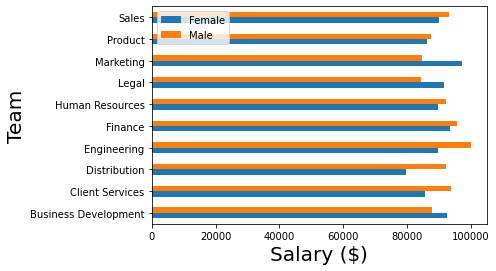

In [18]:
df_employee.groupby(['Gender', 'Team'])['Salary'].mean().unstack(level=0).plot(kind='barh')
plt.xlabel("Salary ($)", fontsize=20)
plt.ylabel("Team", fontsize=20)
plt.legend(loc = 2)

**min()**

In [19]:
df_employee.groupby(['Team'])['Salary'].min()

Team
Business Development    36844
Client Services         35095
Distribution            35575
Engineering             36946
Finance                 35381
Human Resources         35203
Legal                   35061
Marketing               36643
Product                 35013
Sales                   35802
Name: Salary, dtype: int64

**max()**

In [20]:
df_employee.groupby(['Team'])['Salary'].max()

Team
Business Development    147417
Client Services         147183
Distribution            149105
Engineering             147362
Finance                 149908
Human Resources         149903
Legal                   148985
Marketing               146812
Product                 149684
Sales                   144887
Name: Salary, dtype: int64

**Plot min and max salary for each Team**

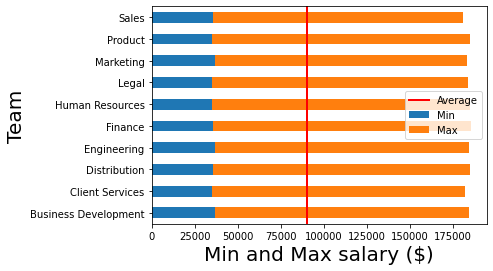

In [21]:
df_employee.groupby(['Team']).agg({'Salary': [np.min,np.max]}).\
plot.barh(stacked=True)
plt.axvline(df_employee['Salary'].mean(), color='red', linewidth=2)
plt.xlabel("Min and Max salary ($)", fontsize=20)
plt.ylabel("Team", fontsize=20)
plt.legend(['Average','Min', 'Max'])

**mode**

In [22]:
df_employee.groupby(['Team', 'Senior Management'])['Salary'].agg(lambda x:x.value_counts().index[0])

Team                  Senior Management
Business Development  False                107050
                      True                 121477
Client Services       False                 62719
                      True                  83341
Distribution          False                 43050
                      True                  58047
Engineering           False                 43455
                      True                  59070
Finance               False                 81215
                      True                 115711
Human Resources       False                 96511
                      True                  98858
Legal                 False                121918
                      True                 128042
Marketing             False                117055
                      True                 107391
Product               False                123711
                      True                  38078
Sales                 False                 92799
          

# **NBA**

## **Read data**

In [23]:
df_nba = pd.read_csv("nba.csv")

## **Basic EDA**

***Top 5 records***

In [24]:
df_nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


**Info**

In [25]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


***Describe***

In [26]:
df_nba.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


**Columns**

In [27]:
df_nba.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

***Data Types***

In [28]:
df_nba.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

**Missing Values**

In [29]:
df_nba.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

***NULL values***

In [30]:
df_nba.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

***Shape***

In [31]:
df_nba.shape

(458, 9)

## **Delete NaN values**


Shape

In [32]:
df_nba.shape
print(f"Columns: {df_nba.shape[1]}\nRows: {df_nba.shape[0]}")

Columns: 9
Rows: 458


Count of nan values in columns

In [33]:
df_nba.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

Drop rows with NaN values

In [34]:
df_nba.dropna(axis=0, inplace=True)

**Shape**

In [35]:
df_nba.shape
print(f"Columns: {df_employee.shape[1]}\nRows: {df_nba.shape[0]}")

Columns: 8
Rows: 364


Count of nan values in columns

In [36]:
df_nba.isna().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

## **Data conversion**

In [37]:
df_nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0


**Convert Weight (lb to kg)**

1lb = 0.45359237 kg

In [38]:
# df_nba['Weight (kg)'] = round(df_nba['Weight'] * 0.45359237, 2)
df_nba['Weight'] = round(df_nba['Weight'] * 0.45359237, 2)

In [39]:
df_nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,81.65,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,106.59,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,83.91,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,106.59,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,107.95,Gonzaga,2165160.0


**Convert Heihgt (ft and in to m)**

1 ft = 0.3048 m

1 in = 0.0254 m

In [40]:
import re
df_nba["ft"] = 0
df_nba['in'] = 0
for i in range(len(df_nba['Height'])):
  m_ft = re.search(r"[1-9]*-", df_nba['Height'].iloc[i])
  df_nba['ft'].iloc[i] = int(m_ft.group()[:-1])
  m_in = re.search(r"-[1-9]*", df_nba['Height'].iloc[i])
  if m_in.group()[1:].isdigit():
    df_nba['in'].iloc[i] = int(m_in.group()[1:])
  else:
    df_nba['in'].iloc[i] = 0


# df_nba['Height (m)'] = round((df_nba['ft'] * 0.3048) + (df_nba['in'] * 0.0254), 2) 
df_nba['Height'] = round((df_nba['ft'] * 0.3048) + (df_nba['in'] * 0.0254), 2) 
del df_nba['ft'], df_nba['in']
df_nba.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,1.88,81.65,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,1.98,106.59,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,1.96,83.91,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,2.03,106.59,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,2.13,107.95,Gonzaga,2165160.0


## **Aggregation functions**


In [41]:
df_nba.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,1.88,81.65,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,1.98,106.59,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,1.96,83.91,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,2.03,106.59,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,2.13,107.95,Gonzaga,2165160.0


In [42]:
# df_nba.groupby(['Position'])["Age" ,"Height (m)", 'Weight (kg)'].mean()
df_nba.groupby(['Position'])["Age" ,"Height", 'Weight'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Age,Height,Weight
Position,,,
C,26.857143,2.071020,114.739388
PF,26.679012,2.011975,108.615556
PG,26.750000,1.888421,86.308026
SF,26.732394,2.010141,100.582254
SG,26.206897,1.969540,93.877356


In [43]:
df_nba.groupby(['Position'])['Salary'].max()

Position
C     19689000.0
PF    22192730.0
PG    21468695.0
SF    22875000.0
SG    20000000.0
Name: Salary, dtype: float64

In [44]:
df_nba.groupby(['Position'])['Salary'].min()

Position
C      83397.0
PF    111444.0
PG     55722.0
SF    200600.0
SG     55722.0
Name: Salary, dtype: float64

In [45]:
df_nba.groupby(['Position'])['Salary'].median()

Position
C     3398280.0
PF    2850000.0
PG    2927470.0
SF    2000000.0
SG    1500000.0
Name: Salary, dtype: float64

## **Visualisation**

(0.0, 25000000.0)

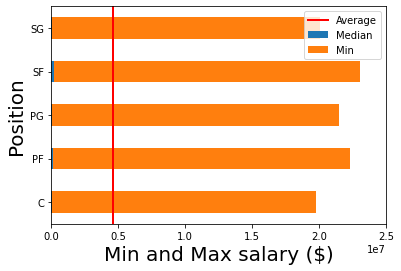

In [46]:
df_nba.groupby(['Position']).agg({'Salary': [np.min,np.max]}).\
plot.barh(stacked=True)
plt.axvline(df_nba['Salary'].mean(), color='red', linewidth=2)
# plt.axvline(df_nba['Salary'].median(), color='black', linewidth=2)

plt.xlabel("Min and Max salary ($)", fontsize=20)
plt.ylabel("Position", fontsize=20)
plt.legend(['Average','Median','Min', 'Max'])
plt.xlim([0, 25000000])

Text(0, 0.5, 'Team')

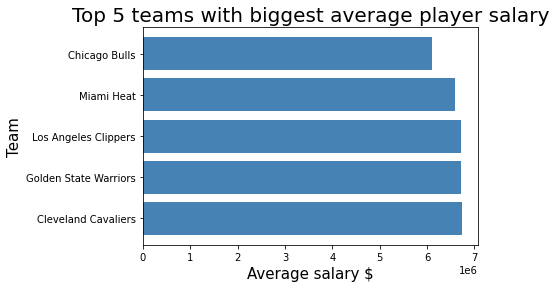

In [47]:
mean_salary_team = df_nba.groupby(['Team'], as_index=False)['Salary'].mean()
mean_salary_team.sort_values(by = ['Salary'], ascending=False, inplace = True)
top5_mean_salary_team = mean_salary_team.head()
plt.barh(top5_mean_salary_team['Team'], top5_mean_salary_team['Salary'],\
         color = 'steelblue')
plt.title('Top 5 teams with biggest average player salary', size = 20)
plt.xlabel("Average salary $", fontsize=15)
plt.ylabel("Team", fontsize=15)

# **Export Employee and NBA**

In [48]:
df_employee.to_csv('employee_update.csv')
files.download('employee_update.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
df_nba.to_csv('nba_update.csv')
files.download('nba_update.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Join/Merge**

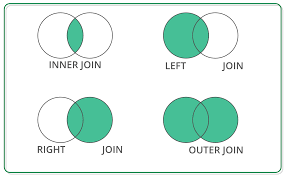

In [50]:

df1 = pd.DataFrame({
    "city": ["Lutsk", "Lviv", "Odessa", "Kyiv"],
    "temperature": [25, 14, 30, 24],
})
df1

,city,temperature
0,Lutsk,25
1,Lviv,14
2,Odessa,30
3,Kyiv,24


In [51]:

df2 = pd.DataFrame({
    "city": ["Lutsk", "Lviv", "Donetsk"],
    "humidity": [65, 68, 69],
})
df2

,city,humidity
0,Lutsk,65
1,Lviv,68
2,Donetsk,69


## **Inner**

In [52]:
df3 = pd.merge(df1, df2)
df3

,city,temperature,humidity
0,Lutsk,25,65
1,Lviv,14,68


## **Left**

In [53]:
df4 = pd.merge(df1, df2, how = 'left')
df4

,city,temperature,humidity
0,Lutsk,25,65.0
1,Lviv,14,68.0
2,Odessa,30,NaN
3,Kyiv,24,NaN


## **Right**

In [54]:
df5 = pd.merge(df1, df2, how = 'right')
df5

,city,temperature,humidity
0,Lutsk,25.0,65
1,Lviv,14.0,68
2,Donetsk,NaN,69


## **Outer**

In [55]:
df6 = pd.merge(df1, df2, how = 'outer')
df6

,city,temperature,humidity
0,Lutsk,25.0,65.0
1,Lviv,14.0,68.0
2,Odessa,30.0,NaN
3,Kyiv,24.0,NaN
4,Donetsk,NaN,69.0
